# Exercise 04 - Due Friday, October 21 at 12pm

*Objectives*: Gain experience loading a CSV dataset into a database model you define yourself and using SQL to explore its contents. Explore the data by writing and executing a number of SQL queries using common syntax and functions and describing your findings.

*Grading criteria*: The tasks should all be completed, and questions should all be answered with SQL queries in the space provided, unless a text answer is requested. Results should be correct, according to the embedded tests. The notebook itself should be completely reproducible; from start to finish, another person should be able to use the same code to obtain the same results as yours.  Note that you will receive no more than partial credit if you do not add text/markdown cells explaining your thinking at each major step in each problem.

*Deadline*: Friday, October 21, 12pm. Submit your notebook to Blackboard and push it to your GitHub repository.

## Setup - obtain data and create database

The US City Open Data Census has data on [restaurant inspections from all over the country](http://us-city.census.okfn.org/dataset/food-safety).  Let's take a look at data from Albuquerque.  *Note*: metadata and other details for this dataset are available at http://data.cabq.gov/business/foodinspections/.

Fyi, to save you a step, I've converted this file into a clean CSV file by using the `dos2unix` command to change its line endings and to switch it to use commas instead of tabs using `csvformat -t inputfile.csv > outputfile.csv`.

First we download the dataset:

In [1]:
!wget https://raw.githubusercontent.com/gwsb-istm-6212-fall-2016/syllabus-and-schedule/master/exercises/abq-food-inspections-fy2010.csv

--2016-10-24 15:36:07--  https://raw.githubusercontent.com/gwsb-istm-6212-fall-2016/syllabus-and-schedule/master/exercises/abq-food-inspections-fy2010.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.32.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.32.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5025226 (4.8M) [text/plain]
Saving to: ‘abq-food-inspections-fy2010.csv’

abq-food-inspection 100%[=====================>]   4.79M  --.-KB/s   in 0.1s   

2016-10-24 15:36:08 (40.4 MB/s) - ‘abq-food-inspections-fy2010.csv’ saved [5025226/5025226]



## Problem 1 - examine the data (35 points)

Use `csvstat` and other tools as you see fit and observe its contents.  Review the metadata definitions linked to above.  Describe what you see:  What do all the columns mean?  Are there null values?  Which columns interest you the most?  Which columns present some complications or questions you would like to ask?

In [2]:
!mv abq-food-inspections-fy2010.csv food.csv

In [3]:
!wc -l food.csv

17557 food.csv


In [4]:
!head -5 food.csv | csvlook

|----------------------+--------------+-------------------------------+-------------+-------+-------+-----------+---------------------+--------------------+---------------+-------------+-------------+------------------+------------+------------------+------------------------------+---------------------+-----------------+-------------------------+------------+-------------+-------------+-------------+----------------+----------------+----------------------------------+------------------|
|  FACILITY_NAME       | FACILITY_KEY | SITE_ADDRESS                  | CITY        | STATE | ZIP   | OWNER_KEY | OWNER_NAME          | NATURE_OF_BUSINESS | STREET_NUMBER | STREET_NAME | STREET_TYPE | POST_DIRECTIONAL | PHONE      | PROGRAM_CATEGORY | PROGRAM_CATEGORY_DESCRIPTION | INSPECTION_DATE     | INSPECTION_TYPE | INSPECTION_DESC         | SERIAL_NUM | ACTION_CODE | ACTION_DESC | RESULT_CODE | RESULT_DESC    | VIOLATION_CODE | VIOLATION_DESC                   | INSPECTION_MEMO  |
|---------------

In [5]:
!head -10 food.csv | csvcut -c1,2,3,4,5 | csvlook

|--------------------------+--------------+-------------------------------+-------------+--------|
|  FACILITY_NAME           | FACILITY_KEY | SITE_ADDRESS                  | CITY        | STATE  |
|--------------------------+--------------+-------------------------------+-------------+--------|
|  00BSAY IT WITH CAKE     | 50534        | 10200 GOLF COURSE RD NW STE B | ALBUQUERQUE | NM     |
|  00BSAY IT WITH CAKE     | 50534        | 10200 GOLF COURSE RD NW STE B | ALBUQUERQUE | NM     |
|  00BSAY IT WITH CAKE     | 50534        | 10200 GOLF COURSE RD NW STE B | ALBUQUERQUE | NM     |
|  00BSAY IT WITH CAKE     | 50534        | 10200 GOLF COURSE RD NW STE B | ALBUQUERQUE | NM     |
|  00BSAY IT WITH CAKE     | 50534        | 10200 GOLF COURSE RD NW STE B | ALBUQUERQUE | NM     |
|  2000 VIETNAM RESTAURANT | 31468        | 601 SAN MATEO BLVD SE         | ALBUQUERQUE | NM     |
|  2000 VIETNAM RESTAURANT | 31468        | 601 SAN MATEO BLVD SE         | ALBUQUERQUE | NM     |
|  2000 VI

In [6]:
!head -10 food.csv | csvcut -c6,7,8,9,10 | csvlook

|--------+-----------+-------------------------+--------------------+----------------|
|  ZIP   | OWNER_KEY | OWNER_NAME              | NATURE_OF_BUSINESS | STREET_NUMBER  |
|--------+-----------+-------------------------+--------------------+----------------|
|  87114 | 47341     | OOBSAY IT WITH CAKE     | CAKE DECORATING    | 10200          |
|  87114 | 47341     | OOBSAY IT WITH CAKE     | CAKE DECORATING    | 10200          |
|  87114 | 47341     | OOBSAY IT WITH CAKE     | CAKE DECORATING    | 10200          |
|  87114 | 47341     | OOBSAY IT WITH CAKE     | CAKE DECORATING    | 10200          |
|  87114 | 47341     | OOBSAY IT WITH CAKE     | CAKE DECORATING    | 10200          |
|  87108 | 29294     | 2000 VIETMAN RESTAURANT | RESTAURANT         | 601            |
|  87108 | 29294     | 2000 VIETMAN RESTAURANT | RESTAURANT         | 601            |
|  87108 | 29294     | 2000 VIETMAN RESTAURANT | RESTAURANT         | 601            |
|  87110 | 66644     | 328 CHINESE CUISINE 

In [7]:
!head -10 food.csv | csvcut -c11,12,13,14,15 | csvlook

|--------------+-------------+------------------+------------+-------------------|
|  STREET_NAME | STREET_TYPE | POST_DIRECTIONAL | PHONE      | PROGRAM_CATEGORY  |
|--------------+-------------+------------------+------------+-------------------|
|  GOLF COURSE | RD          | NW               | 5058339563 | 0405              |
|  GOLF COURSE | RD          | NW               | 5058339563 | 0405              |
|  GOLF COURSE | RD          | NW               | 5058339563 | 0405              |
|  GOLF COURSE | RD          | NW               | 5058339563 | 0405              |
|  GOLF COURSE | RD          | NW               | 5058339563 | 0405              |
|  SAN MATEO   | BLVD        | SE               | 5052320900 | 0406              |
|  SAN MATEO   | BLVD        | SE               | 5052320900 | 0406              |
|  SAN MATEO   | BLVD        | SE               | 5052320900 | 0406              |
|  MENAUL      | BLVD        | NE               | 5058814468 | 0406              |
|---

In [8]:
!head -10 food.csv | csvcut -c16,17,18,19,20,21 | csvlook

|-------------------------------+---------------------+-----------------+-------------------------+------------+--------------|
|  PROGRAM_CATEGORY_DESCRIPTION | INSPECTION_DATE     | INSPECTION_TYPE | INSPECTION_DESC         | SERIAL_NUM | ACTION_CODE  |
|-------------------------------+---------------------+-----------------+-------------------------+------------+--------------|
|  Food Processor               | 2009-10-21 00:00:00 |                 | EMERGENCY RESPONSE      | DA8009125  | 00           |
|  Food Processor               | 2009-10-21 00:00:00 |                 | ROUTINE FOOD INSPECTION | DA8009123  | 11           |
|  Food Processor               | 2009-10-21 00:00:00 |                 | ROUTINE FOOD INSPECTION | DA8009123  | 11           |
|  Food Processor               | 2010-04-14 00:00:00 |                 | ROUTINE FOOD INSPECTION | DA8010205  | 11           |
|  Food Processor               | 2010-04-14 00:00:00 |                 | ROUTINE FOOD INSPECTION | DA80

In [9]:
!head -10 food.csv | csvcut -c22,23,24,25,26,27 | csvlook

|--------------+-------------+----------------+----------------+----------------------------------+------------------|
|  ACTION_DESC | RESULT_CODE | RESULT_DESC    | VIOLATION_CODE | VIOLATION_DESC                   | INSPECTION_MEMO  |
|--------------+-------------+----------------+----------------+----------------------------------+------------------|
|  NON-GRADED  | 00          | NOT APPLICABLE |     68         | Delivered Informational Brochure |                  |
|  APPROVED    | 03          | IN COMPLIANCE  |     00         | No Violations Found              |                  |
|  APPROVED    | 03          | IN COMPLIANCE  |     55         | Additional Comments              |                  |
|  APPROVED    | 03          | IN COMPLIANCE  |     00         | No Violations Found              |                  |
|  APPROVED    | 03          | IN COMPLIANCE  |     55         | Additional Comments              |                  |
|  APPROVED    | 03          | IN COMPLIANCE  | 

In [10]:
!csvcut -n food.csv

  1: FACILITY_NAME
  2: FACILITY_KEY
  3: SITE_ADDRESS
  4: CITY
  5: STATE
  6: ZIP
  7: OWNER_KEY
  8: OWNER_NAME
  9: NATURE_OF_BUSINESS
 10: STREET_NUMBER
 11: STREET_NAME
 12: STREET_TYPE
 13: POST_DIRECTIONAL
 14: PHONE
 15: PROGRAM_CATEGORY
 16: PROGRAM_CATEGORY_DESCRIPTION
 17: INSPECTION_DATE
 18: INSPECTION_TYPE
 19: INSPECTION_DESC
 20: SERIAL_NUM
 21: ACTION_CODE
 22: ACTION_DESC
 23: RESULT_CODE
 24: RESULT_DESC
 25: VIOLATION_CODE
 26: VIOLATION_DESC
 27: INSPECTION_MEMO


In [11]:
!head -17557 food.csv | csvstat 

  1. FACILITY_NAME
	<class 'str'>
	Nulls: False
	Unique values: 2615
	5 most frequent values:
		SMITHS FOOD AND DRUG CENTERS INC:	154
		ISOTOPES PARK - OVATIONS:	93
		PER EHSII CECELIA GARCIA OOB LA REYNA DEL SUR:	85
		ISLETA AMPHITHEATER:	68
		ECHO INC:	68
	Max length: 77
  2. FACILITY_KEY
	<class 'int'>
	Nulls: False
	Min: 13
	Max: 101482
	Sum: 820405773
	Mean: 46730.79135338346
	Median: 50866.0
	Standard Deviation: 32659.794578837962
	Unique values: 2835
	5 most frequent values:
		46323:	93
		65863:	85
		80949:	68
		32817:	68
		91825:	66
  3. SITE_ADDRESS
	<class 'str'>
	Nulls: True
	Unique values: 2456
	5 most frequent values:
		1601 AVENIDA CESAR CHAVEZ SE:	94
		644 OLD COORS BLVD SW:	85
		8601 CENTRAL AV NE:	77
		2200 SUNPORT BLVD SE:	75
		5210 CENTRAL AV SE:	73
	Max length: 35
  4. CITY
	<class 'str'>
	Nulls: False
	Values: ALBUQUERQUE
  5. STATE
	<class 'str'>
	Nulls: False
	Values: 87, NM
  6. ZIP
	<class 'str'>
	Nulls: False
	Unique values: 48
	5 most frequent values:
		87110

### What do all the columns mean? 
1. FACILITY_NAME: Name of the facility where inspection occurred
2. FACILITY_KEY: The unique identifier The unique identifier(key) of the facility where the inspection occured
3. SITE_ADDRESS: Street address of the facility where inspection occurred
4. CITY: City of the facility where inspection occurred 
5. STATE: State of the facility where inspection occurred
6. ZIP: Zip of the facility where inspection occurred
7. OWNER_KEY: The unique identifier (key) of the Owner of facility where the inspection occurred at the time of the inspection
8. OWNER_NAME: Name of the Owner facility where the inspection occurred at the time of inspection 
9. NATURE_OF_BUSINESS: The type of business, originally for internal use only,provies information about the business. This is not the information provided on the federal tax form
10. STREET_NUMBER: Street number of the facility where inspection occurred
11. STREET_NAME: Street name of the facility where inspection occurred
12. STREET_TYPE: Street type of the facility where inspection occurred
13. POST_DIRECTIONAL:  Post directional of the facility where inspection occurred
14. PHONE: Phone number of facility where inspection occured
15. PROGRAM_CATEGORY: Id that indicates the type of facility permit the inspection was performed
16. PROGRAM_CATEGORY_DESCRIPTION: Description of the Id that indicates the type of facility
17. INSPECTION_DATE: Date the inspection occurred
18. INSPECTION_TYPE: Code for type of inspection
19. INSPECTION_DESC: Discription of the inspection
20. SERIAL_NUM: Unique ID for the inspection daily activity.
21. ACTION_CODE: Code of the action taken. If the ACTION_CODE is equal to 00-NON-GRADED this indicates that the inspector was unable to actually perform the inspection. 
22. ACTION_DESC: Description of the action taken
23. RESULT_CODE: Code of the result of inspection
24. RESULT_DESC: Description of the result of the inspection
25. VIOLATION_CODE: The code for the violation
26. VIOLATION_DESC: Description of the violation that was found
27. INSPECTION_MEMO: Notes from the inspection made by the inspector

### Are there null values?

Yes, SITE_ADDRESS, NATURE_OF_BUSINESS, STREET_NUMBER, STREET_NAME, STREET_TYPE, POST_DIRECTIONAL, PHONE,
PROGRAM_CATEGORY_DESCRIPTION, INSPECTION_TYPE, VIOLATION_CODE, VIOLATION_DESC and INSPECTION_MEMO have null values.

### Which columns interest you the most?

FACILITY_NAME: because it is a key variable that some kind of facilities will have larger possibility of inspection problem.

SITE_ADDRESS: it is the variable combined with other four variables, which are STREET_NUMBER, STREET_NAME, STREET_TYPE and POSTAL_DIRECTION. 
Compared with single virables, it can show the detailed address information of facilities.

NATURE_OF_BUSINESS: it is reasonable to connect business type with facility failure

PROGRAM_CATEGORY: compared with PROGRAM_CATEGORY_DESCRIPTION, this variable has numerical value, which is more convenient to be used in deep analysis.

VIOLATION_CODE: it is a important response viraible which can tell us if the inspection was aproved or not

### Which columns present some complications or questions you would like to ask?

SITE_ADDRESS: has null value, which is hard to understand, because I think that every location should have it identical location address

ZIP_CODE: I think it is easy to use zip code in deep data analysis, because it has less words and more clear to see and compare, however, we need to collect the zip code with the real locaiton area, whcih is time-consuming, so it is kind of trade-off.

INSPECTION_DESC: has 12439 records of routine food inspection, which is accounts the major part of the dataset,I am worried if the dataset has skewness problem and isn't a good representation of the whole area.

Insert a combination of code and text/markdown cells here to review the data and describe what you find.

## Problem 2 - define a database model and load the data (35 points)

Based on what you found above, create and connect to a new database, define a database table in it, and load this dataset into it.  You may use either of the methods for this step you have seen in earlier class notebooks.  You may choose to eliminate variables/columns if they are not relevant or interesting to you - explain your reasoning if you do.  Either way, you should load a majority of the columns present in the source dataset into the database and all of its rows.

Once your data has loaded successfully, run a `COUNT(*)` query to verify that all the data has loaded correctly.

Insert a combination of code and text/markdown cells here to connect to your database, define your table, load its data, and verify the loaded records.

 ### Create and connect to a new database

In [12]:
%load_ext sql

/opt/conda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/opt/conda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [13]:
!echo 'redspot' | sudo -S service postgresql restart

[sudo] password for jovyan: Restarting PostgreSQL 9.5 database server: main.


In [14]:
!createdb -U dbuser exercise4

createdb: database creation failed: ERROR:  database "exercise4" already exists


In [15]:
%sql postgresql://dbuser@localhost:5432/exercise4

'Connected: dbuser@exercise4'

### define a database table in database, and load this dataset into database

In [16]:
%%sql
DROP TABLE IF EXISTS  foods_inspection;
CREATE TABLE foods_inspection (
    FACILITY_NAME VARCHAR(77),
    FACILITY_KEY INTEGER,
    SITE_ADDRESS VARCHAR(35),
    CITY VARCHAR(12),
    STATE CHAR(2),
    ZIP CHAR(10),
    OWNER_KEY INTEGER,
    OWNER_NAME VARCHAR(82),
    NATURE_OF_BUSINESS VARCHAR(25),
    STREET_NUMBER CHAR(7),
    STREET_NAME VARCHAR(24),
    STREET_TYPE CHAR(4),
    POST_DIRECTIONAL CHAR(3),
    PHONE CHAR(15),
    PROGRAM_CATEGORY CHAR(4),
    PROGRAM_CATEGORY_DESCRIPTION VARCHAR(40),
    INSPECTION_DATE TIMESTAMP,
    INSPECTION_TYPE CHAR(4),
    INSPECTION_DESC VARCHAR(32),
    SERIAL_NUM VARCHAR(9),
    ACTION_CODE CHAR(2),
    ACTION_DESC VARCHAR(35),
    RESULT_CODE CHAR(2),
    RESULT_DESC VARCHAR(37),
    VIOLATION_CODE CHAR(10),
    VIOLATION_DESC VARCHAR(50),
    INSPECTION_MEMO CHAR(5)
)

Done.
Done.


[]

In [17]:
!pwd

/home/jovyan/work


In [18]:
%%sql
COPY foods_inspection FROM '/home/jovyan/work/food.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

17556 rows affected.


[]

### run a COUNT(*) query to verify that all the data has loaded correctly.

In [19]:
%%sql
SELECT COUNT(*) FROM foods_inspection;

1 rows affected.


count
17556


## Problem 3 - explore your data (30 points)

Now that the data is loaded, ask some questions of it!  Identify key variables of interest and note their ranges along with other useful descriptive statistics.  Choose and define a few lines of inquiry, execute queries for each, and describe what you find in your result sets.  Use any query techniques we've seen in class, including aggregate functions, transformations, subqueries, or others as appropriate. 

If you find interesting patterns, adding plots to your exploration would be useful.

Insert a combination of code and text/markdown cells here to explore your data.

### 1. What proportion of the facilities is in compliance?

In [20]:
%%sql
SELECT DISTINCT RESULT_CODE, RESULT_DESC
FROM foods_inspection 
ORDER BY RESULT_CODE ASC;

19 rows affected.


result_code,result_desc
00,NOT APPLICABLE
02,NOT IN COMPLIANCE
03,IN COMPLIANCE
04,NOTICE
05,DOWNGRADE
06,UPGRADE
07,PERMIT SUSPENSION
08,VOLUNTARY CLOSURE
10,PERMISSION TO OPERATE
11,FACILITY CLOSED AT TIME OF INSPECTION


In [21]:
%%sql
SELECT DISTINCT RESULT_DESC,COUNT(*) AS Frequency
FROM foods_inspection
GROUP BY RESULT_DESC
ORDER BY Frequency DESC;

19 rows affected.


result_desc,frequency
IN COMPLIANCE,14389
NOT APPLICABLE,2416
DOWNGRADE,214
OUT OF BUSINESS,142
TRAINING RECEIVED,104
PHONE CALL,90
UPGRADE,69
IMMEDIATE CLOSURE,45
NOT IN COMPLIANCE,24
FACILITY CLOSED AT TIME OF INSPECTION,19


In [22]:
%matplotlib inline

([<matplotlib.patches.Wedge at 0x7ff2e1965c88>,
  <matplotlib.text.Text at 0x7ff2e18c34e0>])

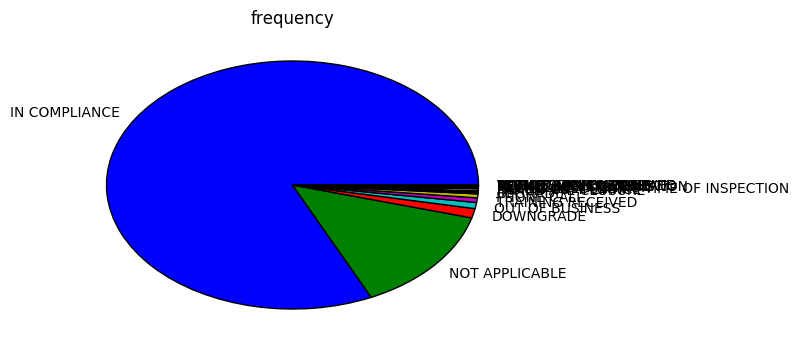

In [23]:
result = _
result.pie()

#### As we can see from the picture, almost five sixth of the facilities are in compliance.

### 2.  Let's dig into the type of facility whcih are not in compliance

In [24]:
%%sql
SELECT DISTINCT FACILITY_NAME,COUNT(*) AS Frequency
FROM foods_inspection 
WHERE RESULT_DESC NOT LIKE '%COMPLIANCE%'
GROUP BY FACILITY_NAME
ORDER BY Frequency DESC;

1907 rows affected.


facility_name,frequency
CHILE ADDICT,32
OOB CALIFORNIA DEL NORTE ICE CREAM LLC,24
SMITHS FOOD AND DRUG CENTERS INC,24
99 BANH SUPERMARKET,21
OOB CAFE AND BILLIARDS LANG THANG,21
OOB POP N TACO DRIVE UP INC.,21
OOB PER EHSII ZAHRA 01/01/14 DHAKA BAZAAR USA,19
OOB PER WRITTEN REQUEST 12/23/13 SCHLOTZSKYS DELI,19
RUBENS INC,18
OOB SMOKIN DJS,17


#### As we can see from the table, the data dstribution is kind of disperse. And the facility with the most inspection issue is CHILE ADDICT, followed with OOB CALIFORNIA DEL NORTE ICE CREAM LLC,SMITHS FOOD AND DRUG CENTERS INC, 99 BANH SUPERMARKET etc,.

### 3. Let's dig into the business nature of facility whcih are not in compliance

In [25]:
%%sql
SELECT DISTINCT NATURE_OF_BUSINESS,COUNT(*) AS Frequency
FROM foods_inspection 
WHERE RESULT_DESC NOT LIKE '%COMPLIANCE%'
GROUP BY NATURE_OF_BUSINESS
ORDER BY Frequency DESC;

462 rows affected.


nature_of_business,frequency
RESTAURANT,903
FOOD SERVICE,124
GROCERY,107
None,85
BAR/RESTAURANT,71
APS SCHOOL FOOD SERVICE,67
BKRY/GROC/REST,48
APS SCHOOL FOODSERVICE,46
GAS STATION,46
INST KITCHEN,44


#### As we can find in the table, restaurant, food service and grocery are most likely to have inpection problems.

### 4. Transformation inspection_date for future use

In [26]:
%%sql
SELECT TO_CHAR(inspection_date, 'YYYY-MM-DD') AS inspection_day_of_year, 
    TO_CHAR(inspection_date, 'YYYY') AS inspection_year,
    TO_CHAR(inspection_date, 'MM') AS inspection_month,
    TO_CHAR(inspection_date, 'DD') AS inspection_day,
    TO_CHAR(inspection_date, 'Day') AS inspection_day_of_week_str,
    TO_CHAR(inspection_date, 'D') AS inspection_day_of_week,
    CASE WHEN CAST(TO_CHAR(inspection_date, 'D') AS INTEGER) >= 6 
        THEN 1 
        ELSE 0
    END AS inspection_is_weekend,
    CASE WHEN CAST(TO_CHAR(inspection_date, 'D') AS INTEGER) < 6 
        THEN 1 
        ELSE 0
    END AS inspection_is_weekday,
    TO_CHAR(inspection_date, 'HH24') AS inspection_hour_24,
    TO_CHAR(inspection_date, 'Q') AS inspection_quarter
FROM foods_inspection
LIMIT 10
;

10 rows affected.


inspection_day_of_year,inspection_year,inspection_month,inspection_day,inspection_day_of_week_str,inspection_day_of_week,inspection_is_weekend,inspection_is_weekday,inspection_hour_24,inspection_quarter
2009-10-21,2009,10,21,Wednesday,4,0,1,00,4
2009-10-21,2009,10,21,Wednesday,4,0,1,00,4
2009-10-21,2009,10,21,Wednesday,4,0,1,00,4
2010-04-14,2010,04,14,Wednesday,4,0,1,00,2
2010-04-14,2010,04,14,Wednesday,4,0,1,00,2
2010-03-23,2010,03,23,Tuesday,3,0,1,00,1
2010-03-23,2010,03,23,Tuesday,3,0,1,00,1
2010-03-23,2010,03,23,Tuesday,3,0,1,00,1
2009-12-15,2009,12,15,Tuesday,3,0,1,00,4
2009-12-15,2009,12,15,Tuesday,3,0,1,00,4


In [27]:
%%sql
ALTER TABLE foods_inspection
ADD COLUMN inspection_day_of_year char(10),
ADD COLUMN inspection_year INTEGER,
ADD COLUMN inspection_month INTEGER,
ADD COLUMN inspection_day INTEGER;

Done.


[]

In [28]:
%%sql
UPDATE foods_inspection SET (inspection_day_of_year, inspection_year, inspection_month, inspection_day) = 
(        TO_CHAR(inspection_date, 'YYYY-MM-DD'), 
    CAST(TO_CHAR(inspection_date, 'YYYY') AS INTEGER),
    CAST(TO_CHAR(inspection_date, 'MM') AS INTEGER),
    CAST(TO_CHAR(inspection_date, 'DD') AS INTEGER)
 );

17556 rows affected.


[]

In [29]:
%%sql
SELECT inspection_date,
       inspection_day_of_year, 
       inspection_year, 
       inspection_month, 
       inspection_day
FROM foods_inspection
LIMIT 10

10 rows affected.


inspection_date,inspection_day_of_year,inspection_year,inspection_month,inspection_day
2009-07-24 00:00:00,2009-07-24,2009,7,24
2009-10-21 00:00:00,2009-10-21,2009,10,21
2009-10-21 00:00:00,2009-10-21,2009,10,21
2009-10-21 00:00:00,2009-10-21,2009,10,21
2010-04-14 00:00:00,2010-04-14,2010,4,14
2010-04-14 00:00:00,2010-04-14,2010,4,14
2010-03-23 00:00:00,2010-03-23,2010,3,23
2010-03-23 00:00:00,2010-03-23,2010,3,23
2010-03-23 00:00:00,2010-03-23,2010,3,23
2009-12-15 00:00:00,2009-12-15,2009,12,15


### 5. Explore the relatonship between date and inspection result by using subquery and tranformed date columns

In [30]:
%%sql
SELECT inspection_year, inspection_month, COUNT(*) AS Frequency
FROM foods_inspection
WHERE inspection_date IN
      (SELECT inspection_date
       FROM foods_inspection
       WHERE RESULT_DESC NOT LIKE '%COMPLIANCE%')
GROUP BY inspection_year, inspection_month
ORDER BY inspection_year, inspection_month;

12 rows affected.


inspection_year,inspection_month,frequency
2009,7,1423
2009,8,1278
2009,9,2030
2009,10,1678
2009,11,1706
2009,12,2084
2010,1,1410
2010,2,1284
2010,3,1381
2010,4,1056


<Container object of 12 artists>

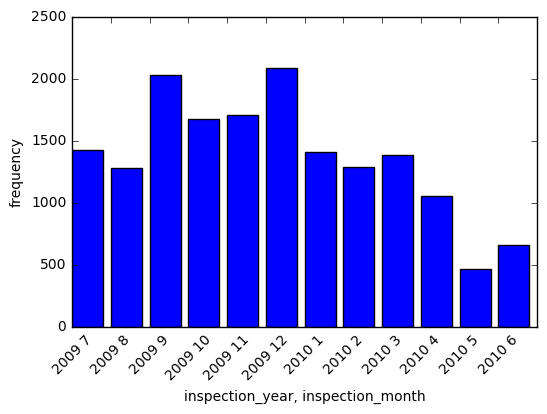

In [31]:
%matplotlib inline
result = _
result.bar()

#### As we can see from the picture, compared with 2009, there are less facility have inspection problems. And overall, there is a trend of decreasing. 

## Bonus (10 points)

We have seen a few simple techniques for normalizing data in class.  Choose a column or set of columns that might be redundant and normalize them out to another table:

* Identify the columns to normalize in the source data table
* Create one or more new tables to hold the normalized records
* Extract data into the new tables
* Re-insert the new foreign key references from the new table into the source table

### 1. Identify the columns to normalize in the source data table
#### FACILITY_NAME, FACILITY_KEY, OWNER_NAME, OWNER_KEY have redanduncy

### 2. Create one or more new tables to hold the normalized records

In [32]:
%%sql
DROP TABLE IF EXISTS new;
CREATE TABLE new(
    id SERIAL,
    name VARCHAR(180),
    restaurant_id INTEGER
);

Done.
Done.


[]

In [33]:
%%sql
INSERT INTO new (name, restaurant_id)
SELECT restaurant_name, restaurant_id FROM (
    SELECT DISTINCT facility_name AS restaurant_name, facility_key AS restaurant_id FROM foods_inspection
    UNION
    SELECT DISTINCT owner_name AS restaurant_name, owner_key AS restaurant_id FROM foods_inspection
) AS d;

4727 rows affected.


[]